In [18]:
df <- read.csv("sampled_job_descriptions.csv", sep=",", header=TRUE, fill=TRUE)

In [19]:
library(readr)
library(dplyr)

In [12]:
# Example data
data <- data.frame(Salary.Range = c("$12K-$128K", "$40K-$90K", "$80K-$150K"))

# Function to extract numeric values
extract_numeric <- function(x) {
  # Extract numeric part and remove non-numeric characters
  numeric_part <- gsub("\\D", "", x)
  # Convert to numeric (handling empty strings)
  ifelse(numeric_part == "", NA, as.numeric(numeric_part))
}

# Split the "Salary.Range" column by "-"
data <- data %>%
  mutate(Salary.Range = strsplit(Salary.Range, "-")) %>%
  # Extract minimum and maximum values
  mutate(
    minRange = extract_numeric(sapply(Salary.Range, `[`, 1)) * 1000,
    maxRange = extract_numeric(sapply(Salary.Range, `[`, 2)) * 1000
  )

# Print the modified data frame
print(data)

  Salary.Range minRange maxRange
1  $12K, $128K    12000   128000
2   $40K, $90K    40000    90000
3  $80K, $150K    80000   150000


In [21]:
# Function to extract numeric values
extract_numeric <- function(x) {
  # Extract numeric part and remove non-numeric characters
  numeric_part <- gsub("\\D", "", x)
  # Convert to numeric (handling empty strings)
  ifelse(numeric_part == "", NA, as.numeric(numeric_part))
}

# Split the "Salary.Range" column by "-"
df_new <- df %>%
  mutate(Salary.Range = strsplit(as.character(Salary.Range), "-")) %>%
  # Extract minimum and maximum values
  mutate(
    minRange = extract_numeric(sapply(Salary.Range, `[`, 1)) * 1000,
    maxRange = extract_numeric(sapply(Salary.Range, `[`, 2)) * 1000
  )

# Print the modified data frame
print(head(df_new, 5))

     Experience Qualifications Salary.Range          Country Work.Type
1 4 to 11 Years          M.Com  $61K, $128K   Macedonia, FYR Temporary
2 3 to 10 Years         M.Tech  $65K, $129K        Greenland    Intern
3 0 to 15 Years         M.Tech  $56K, $114K         Kiribati Full-Time
4 2 to 12 Years            PhD  $57K, $113K Papua New Guinea    Intern
5  2 to 9 Years          B.Com  $57K, $110K          Georgia Temporary
  Company.Size Job.Posting.Date Preference           Job.Title
1        90997       2023-02-08     Female  Landscape Designer
2       123218       2023-05-10     Female Structural Engineer
3        62356       2023-04-11       Male  Physical Therapist
4        61041       2023-07-13       Both           Architect
5        84565       2023-08-10       Both      Office Manager
                              Role   Job.Portal
1 Sustainable Landscape Specialist ZipRecruiter
2            Construction Engineer     FlexJobs
3     Geriatric Physical Therapist  SimplyHired
4   

In [22]:
head(df_new, 5)

,Experience,Qualifications,Salary.Range,Country,Work.Type,Company.Size,Job.Posting.Date,Preference,Job.Title,Role,Job.Portal,Benefits,skills,Company.Profile,minRange,maxRange
,<chr>,<chr>,<list>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,4 to 11 Years,M.Com,"$61K , $128K","Macedonia, FYR",Temporary,90997,2023-02-08,Female,Landscape Designer,Sustainable Landscape Specialist,ZipRecruiter,"{'Transportation Benefits, Professional Development, Bonuses and Incentive Programs, Profit-Sharing, Employee Discounts'}",Sustainable landscape design Native plant selection Water conservation Soil health Green building practices LEED certification,"{""Sector"":""Oil & Gas"",""Industry"":""Oil and Gas"",""City"":""London"",""State"":""N/A"",""Zip"":""N/A"",""Website"":""www.bp.com"",""Ticker"":""BP"",""CEO"":""Bernard Looney""}",61000,128000
2,3 to 10 Years,M.Tech,"$65K , $129K",Greenland,Intern,123218,2023-05-10,Female,Structural Engineer,Construction Engineer,FlexJobs,"{'Health Insurance, Retirement Plans, Flexible Work Arrangements, Employee Assistance Programs (EAP), Bonuses and Incentive Programs'}",Construction management Structural design AutoCAD proficiency Project management Site inspection,"{""Sector"":""Utilities"",""Industry"":""Utilities: Gas and Electric"",""City"":""King of Prussia"",""State"":""Pennsylvania"",""Zip"":""19406"",""Website"":""www.ugicorp.com"",""Ticker"":""UGI"",""CEO"":""Roger Perreault""}",65000,129000
3,0 to 15 Years,M.Tech,"$56K , $114K",Kiribati,Full-Time,62356,2023-04-11,Male,Physical Therapist,Geriatric Physical Therapist,SimplyHired,"{'Casual Dress Code, Social and Recreational Activities, Employee Referral Programs, Health and Wellness Facilities, Life and Disability Insurance'}",Geriatric rehabilitation Fall prevention Elderly patient care,"{""Sector"":""Aerospace and Defense"",""Industry"":""Aerospace & Defense"",""City"":""Reston"",""State"":""Virginia"",""Zip"":""20190"",""Website"":""www.gd.com"",""Ticker"":""GD"",""CEO"":""Phebe N. Novakovic""}",56000,114000
4,2 to 12 Years,PhD,"$57K , $113K",Papua New Guinea,Intern,61041,2023-07-13,Both,Architect,Sustainable Design Specialist,Jobs2Careers,"{'Life and Disability Insurance, Stock Options or Equity Grants, Employee Recognition Programs, Health Insurance, Social and Recreational Activities'}",Sustainable design principles Energy efficiency LEED certification Green building materials Environmental impact assessment,"{""Sector"":""Automotive"",""Industry"":""Automotive Retailing, Services"",""City"":""Medford"",""State"":""Oregon"",""Zip"":""97501"",""Website"":""www.lithiadriveway.com"",""Ticker"":""LAD"",""CEO"":""Bryan B. Deboer""}",57000,113000
5,2 to 9 Years,B.Com,"$57K , $110K",Georgia,Temporary,84565,2023-08-10,Both,Office Manager,Office Coordinator,Idealist,"{'Childcare Assistance, Paid Time Off (PTO), Relocation Assistance, Flexible Work Arrangements, Professional Development'}",Office administration Calendar management Reception duties Communication skills Record keeping Office supplies management,"{""Sector"":""Retail"",""Industry"":""Automotive Retailing, Services"",""City"":""Richmond"",""State"":""Virginia"",""Zip"":""23238"",""Website"":""www.carmax.com"",""Ticker"":""KMX"",""CEO"":""William D. Nash""}",57000,110000


In [24]:
# List column names
column_names <- colnames(df)

# Print the column names
print(column_names)

 [1] "Experience"       "Qualifications"   "Salary.Range"     "Country"         
 [5] "Work.Type"        "Company.Size"     "Job.Posting.Date" "Preference"      
 [9] "Job.Title"        "Role"             "Job.Portal"       "Benefits"        
[13] "skills"           "Company.Profile" 


In [25]:
# List column names
column_names2 <- colnames(df_new)

# Print the column names
print(column_names2)

 [1] "Experience"       "Qualifications"   "Salary.Range"     "Country"         
 [5] "Work.Type"        "Company.Size"     "Job.Posting.Date" "Preference"      
 [9] "Job.Title"        "Role"             "Job.Portal"       "Benefits"        
[13] "skills"           "Company.Profile"  "minRange"         "maxRange"        


In [26]:
# Now, view the top 5 rows of the "minRange" and "maxRange" columns
min_max <- df_new[, c("minRange", "maxRange")]
print(head(min_max, 5))

  minRange maxRange
1    61000   128000
2    65000   129000
3    56000   114000
4    57000   113000
5    57000   110000


In [27]:
dim(df)

[1] 100000     14

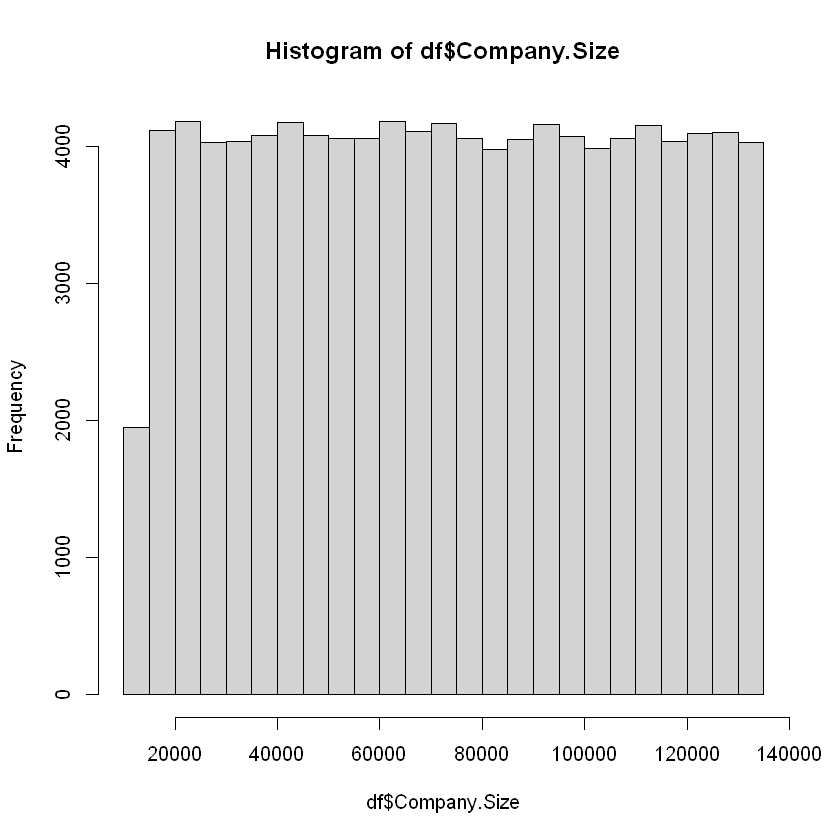

In [7]:
hist(df$Company.Size)

In [8]:
df['Job.Posting.Date']

Job.Posting.Date
<chr>
2023-02-08
2023-05-10
2023-04-11
2023-07-13
2023-08-10
2023-01-19
2023-06-09
2023-05-10
2023-02-14


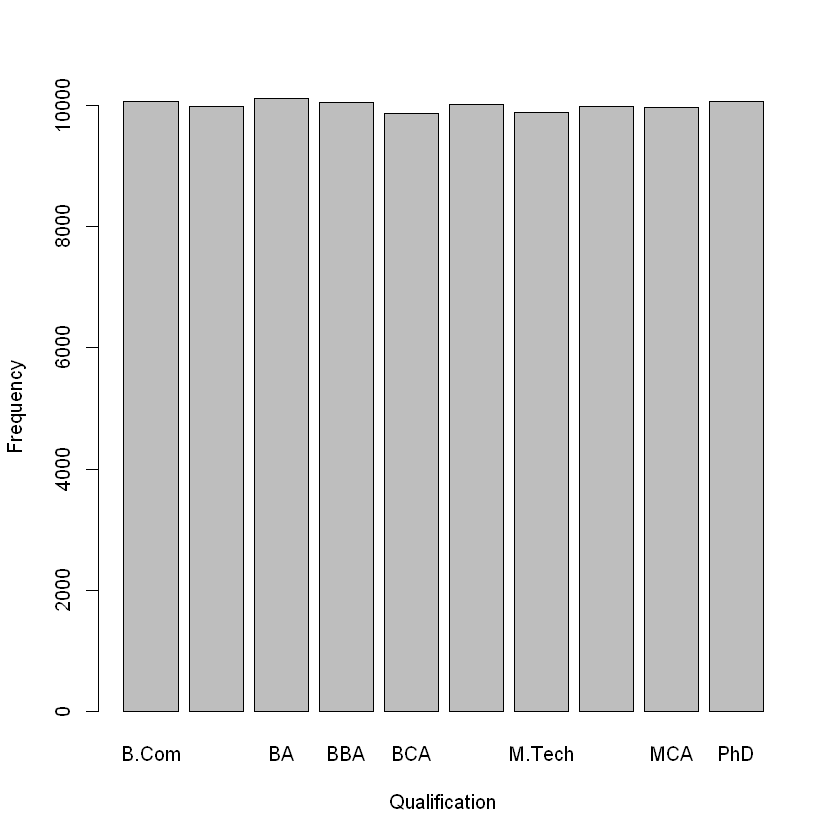

In [9]:
barplot(table(df$Qualifications), ylab="Frequency", xlab="Qualification")

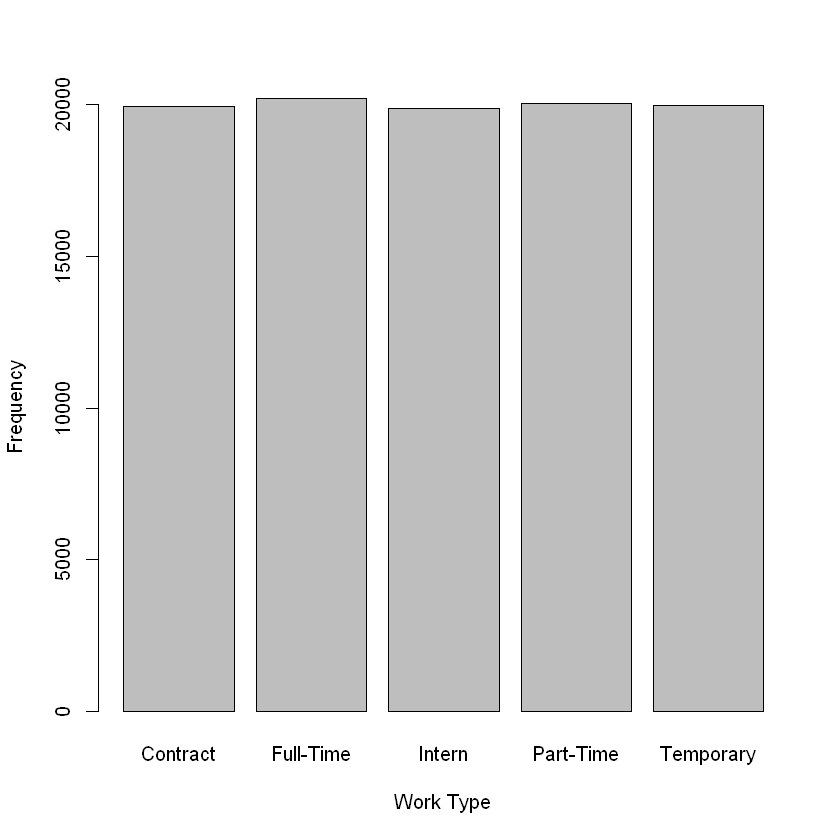

In [10]:
barplot(table(df$Work.Type), ylab="Frequency", xlab="Work Type")